<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/MNIST_Fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the MNIST fashion dataset

In [1]:
import tensorflow as tf

fashion_data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data() 

4423680/4422102 [==============================] - 0s 0us/step


## Check the shape of training and test images

In [2]:
print('train images shape: {}'.format(train_images.shape))
print('test images shape: {}'.format(test_images.shape))
print('train labels shape: {}'.format(train_labels.shape))
print('test labels shape: {}'.format(test_labels.shape))

train images shape: (60000, 28, 28)
test images shape: (10000, 28, 28)
train labels shape: (60000,)
test labels shape: (10000,)


This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

In [3]:
labels = ['T-shirt/top',
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle boot'
          ]

In [4]:
# check the label of the first train image
print(train_labels[0])

9


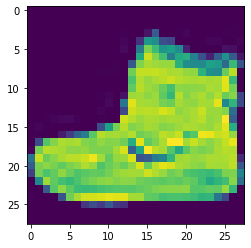

label:  Ankle boot


In [5]:
# display this image
import matplotlib.pyplot as plt

index = 0
img = train_images[index,:,:]
plt.imshow(img)
plt.show()
print('label: ',labels[train_labels[index]])

In [6]:
import numpy as np

np.set_printoptions(linewidth=200)
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [7]:
# Rescale the image values so that they lie in between 0 and 1
train_images = train_images /255.0
test_images = test_images/255.0

#Define a simple convolutional model

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(3,3),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), tf.keras.metrics.MeanAbsoluteError()])

In [11]:
print(model.optimizer)
print(model.optimizer.lr)
print(model.loss)
print(model.metrics)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
sparse_categorical_crossentropy
[]


# Fit the model

In [12]:
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 7s - loss: 0.8373 - sparse_categorical_accuracy: 0.7399 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 0s - loss: 0.4815 - sparse_categorical_accuracy: 0.8329 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 0s - loss: 0.4261 - sparse_categorical_accuracy: 0.8524 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 0s - loss: 0.3938 - sparse_categorical_accuracy: 0.8628 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 0s - loss: 0.3758 - sparse_categorical_accuracy: 0.8698 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 0s - loss: 0.3617 - sparse_categorical_accuracy: 0.8735 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 0s - loss: 0.3504 - sparse_categorical_accuracy: 0.8776 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 1s - loss: 0.3421 - sparse_categorical_accuracy: 0.8795 - mean_absolute_error: 4.4200


**Note:** we need to set a dummy channel dimension to the training images, otherwise `fit method` gives an error.
This is due to the fact that in the sequential model, a channel dimension is given `input_shape=(28, 28, 1)`. See following example on `np.newaxis`

In [13]:
example = np.array([1, 2, 3, 4])
print(example)
print(example.shape)

[1 2 3 4]
(4,)


In [14]:
print(example[np.newaxis,:])
print(example[np.newaxis,:].shape)

[[1 2 3 4]]
(1, 4)


In [15]:
print(example[:,np.newaxis])
print(example[:,np.newaxis].shape)

[[1]
 [2]
 [3]
 [4]]
(4, 1)


In [16]:
print(example[...,np.newaxis])
print(example[...,np.newaxis].shape)

[[1]
 [2]
 [3]
 [4]]
(4, 1)


# Load the history into a pandas DataFrame

In [19]:
import pandas as pd

df = pd.DataFrame(history.history)

In [22]:
print(df.head())

       loss  sparse_categorical_accuracy  mean_absolute_error
0  0.837306                     0.739883             4.420001
1  0.481491                     0.832883             4.420001
2  0.426121                     0.852383             4.420001
3  0.393798                     0.862800             4.420001
4  0.375850                     0.869767             4.419999


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

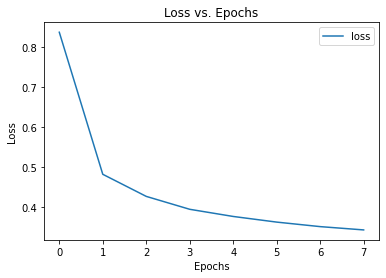

In [30]:
loss_plot = df.plot(y='loss', title='Loss vs. Epochs')
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

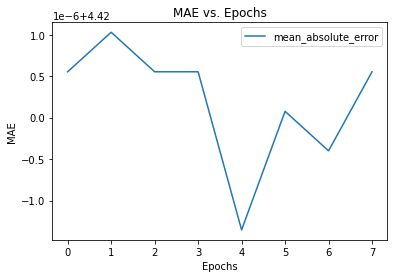

In [32]:
mae_plot = df.plot(y='mean_absolute_error', title='MAE vs. Epochs')
mae_plot.set(xlabel='Epochs', ylabel='MAE')

[Text(0, 0.5, 'sparse_categorical_accuracy'), Text(0.5, 0, 'Epochs')]

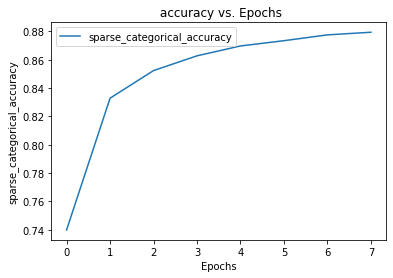

In [33]:
acc_plot = df.plot(y='sparse_categorical_accuracy', title=' accuracy vs. Epochs')
acc_plot.set(xlabel='Epochs', ylabel='sparse_categorical_accuracy')